# Build an Autoencoders deep neural network model for solving any specific problems. The task and dataset you  may decide for which build a model.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [3]:
# we will start simple with a single fully-connected neural layer as encoder and decoder
# this is the siez of our encoded representations
ENCODING_DIM = 32

# input placeholder
input_img = tf.keras.layers.Input(shape=(784,))

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu')(input_img)

# this is the loss reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, decoded)

In [4]:
# let's also create a seprate encoder model
# this mode maps an input to its encoded representation
encoder = tf.keras.models.Model(input_img, encoded)

In [5]:
# as well as decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = tf.keras.layers.Input(shape=(ENCODING_DIM,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

In [6]:
# Now let's train our autoencoder to reconstruct MNIST digits
# first we will configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
# let's prepare our input data. We are using MNIST digits and we are disregrading the labels (since we are only interested in encoding/decoding the input images)
# load the data
(x_train, _), (x_test, _) = load_data('mnist.npz')

In [11]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [12]:
# now let's train our autoencoder for 50 epochs
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 9ms/step - loss: 0.6935 - val_loss: 0.6935
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 3/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6929 - val_loss: 0.6929
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6924 - val_loss: 0.6923
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6922 - val_loss: 0.6921
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.6920 - val_loss: 0.6920
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.6918 - val_loss: 0.6918

In [14]:
# after 50 epochs the autoencoder seems to reach a stable train/test loss value of about 0.11. We can try to visualize the reconstructed inputs and the encoded representations. We will be using Matplotlib
# encode and decode some digits
# note that we take them from the "test" set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


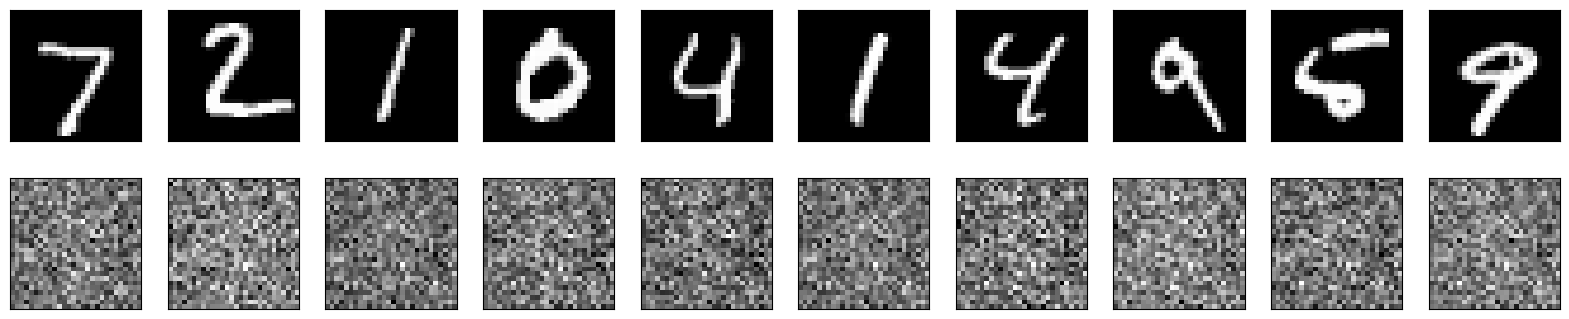

In [15]:
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [16]:
ENCODING_DIM = 32

input_img = tf.keras.layers.Input(shape=(784,))

# add a dense layer with L1 activity regularizer
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# now let's train this for 100 epochs (with added regularization, the model is less likely to overfit and can be trained longer). The model ends with a train loss of 0.11 and test loss of 0.10. The difference is mostly due to the regularization term being added to the loss during training
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 9ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 2/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 3/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 8/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 9/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6934 - val_loss: 0.6934
Epoch 10/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6933 - val_l

235/235 [==============================] - 2s 9ms/step - loss: 0.6744 - val_loss: 0.6738
Epoch 82/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6738 - val_loss: 0.6733
Epoch 83/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6733 - val_loss: 0.6727
Epoch 84/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6727 - val_loss: 0.6721
Epoch 85/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6720 - val_loss: 0.6714
Epoch 86/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6714 - val_loss: 0.6708
Epoch 87/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6708 - val_loss: 0.6701
Epoch 88/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6701 - val_loss: 0.6694
Epoch 89/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6694 - val_loss: 0.6687
Epoch 90/100
235/235 [==============================] - 2s 8ms/step - loss: 0.6687 - val_loss:

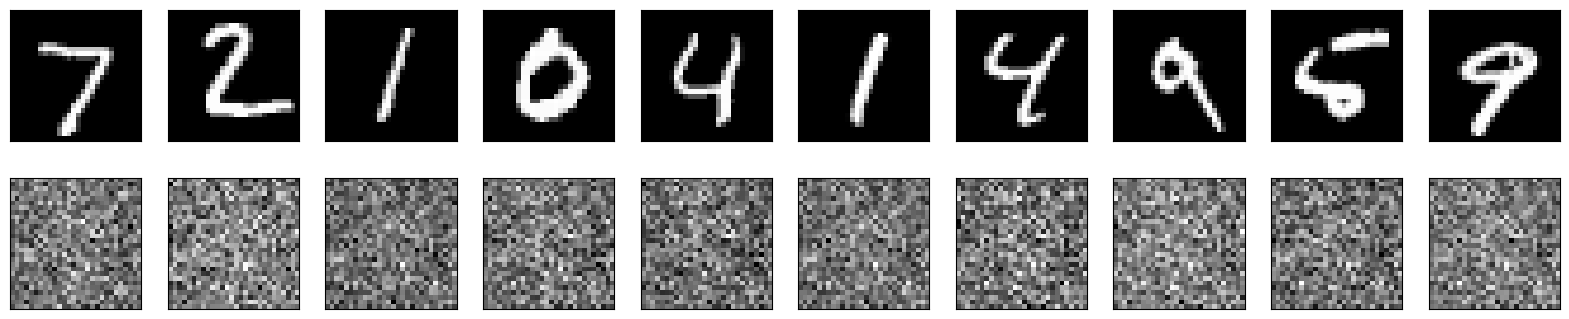

In [17]:
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [19]:
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(128, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)

decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)

In [20]:
# let's try this
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 13ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6932 - val_loss: 0.6932
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 4/100
235/235 [==============================] - 4s 15ms/step - loss: 0.6931 - val_loss: 0.6930
Epoch 5/100
235/235 [==============================] - 4s 15ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 6/100
235/235 [==============================] - 4s 16ms/step - loss: 0.6929 - val_loss: 0.6928
Epoch 7/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6928 - val_loss: 0.6927
Epoch 8/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6927 - val_loss: 0.6926
Epoch 9/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6926 - val_loss: 0.6925
Epoch 10/100
235/235 [==============================] - 3s 15ms/step - loss: 0.692

235/235 [==============================] - 3s 13ms/step - loss: 0.6812 - val_loss: 0.6809
Epoch 81/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6808 - val_loss: 0.6805
Epoch 82/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6804 - val_loss: 0.6801
Epoch 83/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6800 - val_loss: 0.6797
Epoch 84/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6795 - val_loss: 0.6792
Epoch 85/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6790 - val_loss: 0.6787
Epoch 86/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6785 - val_loss: 0.6782
Epoch 87/100
235/235 [==============================] - 4s 15ms/step - loss: 0.6780 - val_loss: 0.6776
Epoch 88/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6774 - val_loss: 0.6770
Epoch 89/100
235/235 [==============================] - 3s 13ms/step - loss: 0.6768 - 

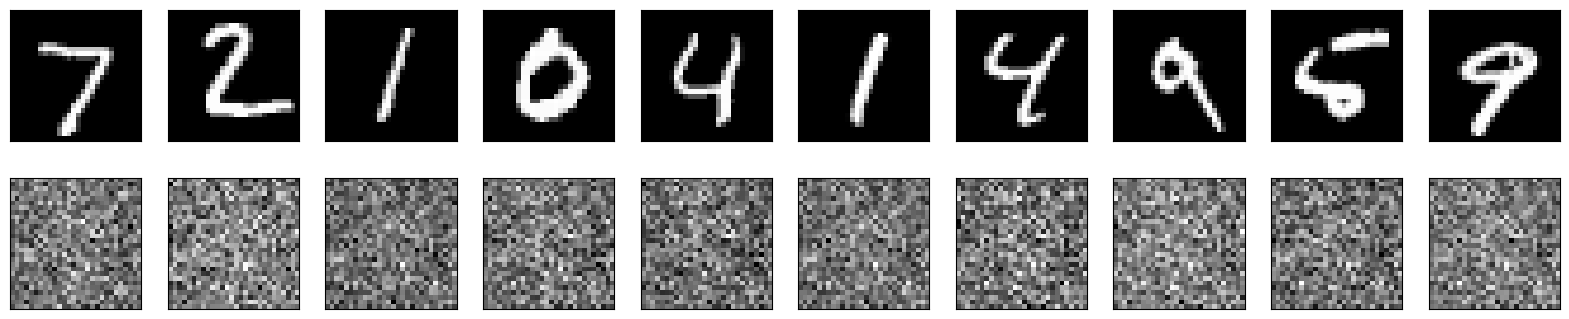

In [21]:
# now using Matplotlib to plot the images
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [22]:
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
# to train this model we will with original MNIST digits with shape (samples, 3, 28, 28) and we will just normalize pixel values between 0 and 1
(x_train, _), (x_test, _) = load_data('mnist.npz')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [25]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 45s 93ms/step - loss: 0.6969 - val_loss: 0.6945
Epoch 2/50
469/469 [==============================] - 46s 99ms/step - loss: 0.6914 - val_loss: 0.6878
Epoch 3/50
469/469 [==============================] - 48s 103ms/step - loss: 0.6825 - val_loss: 0.6758
Epoch 4/50
469/469 [==============================] - 46s 99ms/step - loss: 0.6629 - val_loss: 0.6444
Epoch 5/50
469/469 [==============================] - 48s 103ms/step - loss: 0.6021 - val_loss: 0.5482
Epoch 6/50
469/469 [==============================] - 46s 98ms/step - loss: 0.5127 - val_loss: 0.5004
Epoch 7/50
469/469 [==============================] - 46s 98ms/step - loss: 0.4911 - val_loss: 0.4894
Epoch 8/50
469/469 [==============================] - 47s 100ms/step - loss: 0.4812 - val_loss: 0.4802
Epoch 9/50
469/469 [==============================] - 48s 103ms/step - loss: 0.4727 - val_loss: 0.4722
Epoch 10/50
469/469 [==============================] - 46s 99ms/step - loss: 0

313/313 [==============================] - 3s 10ms/step


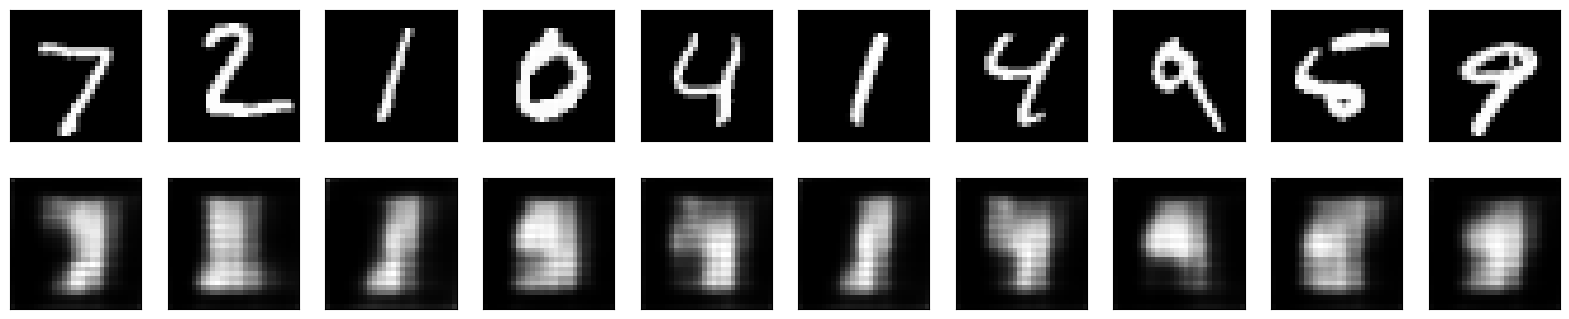

In [26]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# # we can also look at the 128-dimensional encoded representations. These representations are 8x4x4, so we reshape them to 4x32 in order to be able to display them as grayscale images
# n = 10
# plt.figure(figsize=(20, 8))
# for i in range(n):
#     ax = plt.subplot(1, n, i + 1)
#     plt.imshow(encoded_imgs[i + 1].reshape(4, 4 * 8).T)
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
# plt.show()

In [28]:
(x_train, _), (x_test, _) = load_data('mnist.npz')

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor + np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

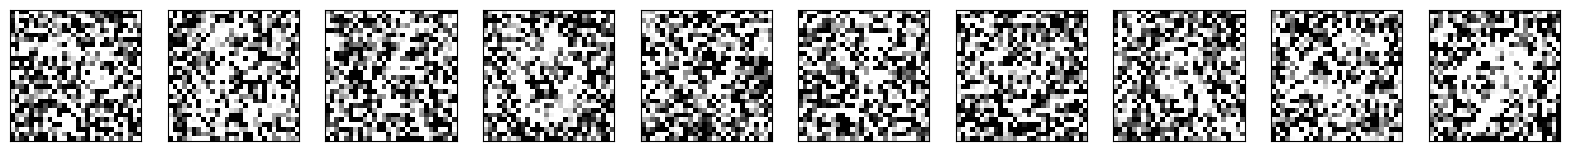

In [29]:
# here's what the noisy digits look like
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
# Can our autoencoder learn to recover the original digits. We will use a slightly different model with more filters per layer
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# the representation is (7, 7, 32)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [31]:
# let's train for 100 epochs
autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test), callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 84s 176ms/step - loss: 0.6916 - val_loss: 0.6851
Epoch 2/100
469/469 [==============================] - 100s 213ms/step - loss: 0.6743 - val_loss: 0.6591
Epoch 3/100
469/469 [==============================] - 115s 245ms/step - loss: 0.6235 - val_loss: 0.5710
Epoch 4/100
469/469 [==============================] - 87s 185ms/step - loss: 0.5144 - val_loss: 0.4880
Epoch 5/100
469/469 [==============================] - 86s 183ms/step - loss: 0.4802 - val_loss: 0.4803
Epoch 6/100
469/469 [==============================] - 90s 192ms/step - loss: 0.4737 - val_loss: 0.4739
Epoch 7/100
469/469 [==============================] - 86s 184ms/step - loss: 0.4672 - val_loss: 0.4670
Epoch 8/100
469/469 [==============================] - 86s 184ms/step - loss: 0.4602 - val_loss: 0.4603
Epoch 9/100
469/469 [==============================] - 86s 183ms/step - loss: 0.4538 - val_loss: 0.4539
Epoch 10/100
469/469 [==============================] - 86s 18

469/469 [==============================] - 86s 184ms/step - loss: 0.2294 - val_loss: 0.2286
Epoch 80/100
469/469 [==============================] - 87s 186ms/step - loss: 0.2289 - val_loss: 0.2281
Epoch 81/100
469/469 [==============================] - 87s 186ms/step - loss: 0.2284 - val_loss: 0.2277
Epoch 82/100
469/469 [==============================] - 77s 165ms/step - loss: 0.2279 - val_loss: 0.2272
Epoch 83/100
469/469 [==============================] - 76s 163ms/step - loss: 0.2275 - val_loss: 0.2267
Epoch 84/100
469/469 [==============================] - 82s 175ms/step - loss: 0.2270 - val_loss: 0.2263
Epoch 85/100
469/469 [==============================] - 80s 171ms/step - loss: 0.2266 - val_loss: 0.2258
Epoch 86/100
469/469 [==============================] - 76s 163ms/step - loss: 0.2261 - val_loss: 0.2254
Epoch 87/100
469/469 [==============================] - 76s 163ms/step - loss: 0.2257 - val_loss: 0.2250
Epoch 88/100
469/469 [==============================] - 77s 163ms/st

313/313 [==============================] - 4s 11ms/step


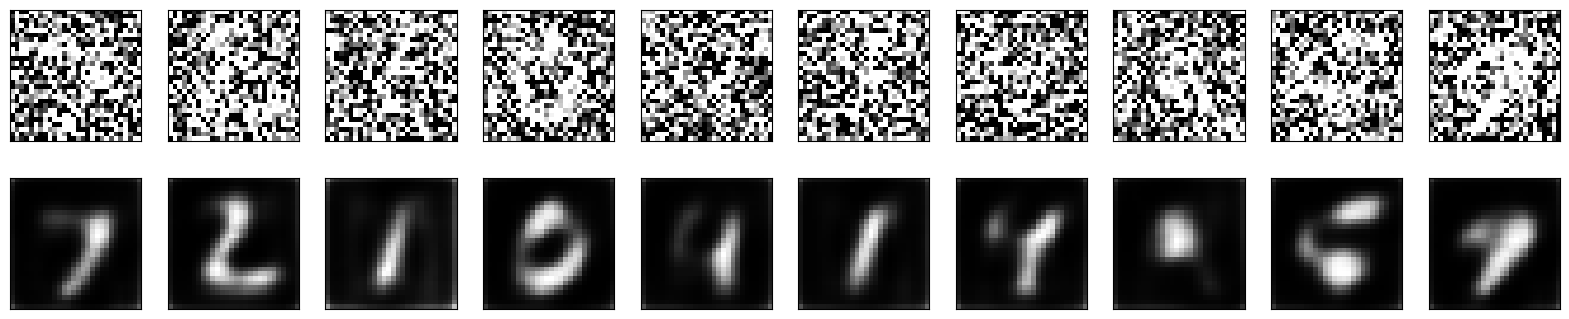

In [32]:
# Let's see how it did
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
# inputs = tf.keras.layers.Input(shape=(timesteps, input_dim))
# encoded = tf.keras.layers.LSTM(latent_dim)(inputs)

# decoded = tf.keras.layers.RepeatVector(timesteps)(encoded)
# decoded = tf.keras.layers.LSTM(input_dmi, return_sequences=True)(decoded)

# sequence_autoencoder = tf.keras.models.Model(inputs, decoded)
# encoder = tf.keras.models.Model(inputs, encoded)

In [34]:
# helper functions

# reparameterization trick
# instead of sampling from Q(z|X), sample eps = N(0,I)
# z = z_mean + sqrt(var)*eps
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.keras.backend.shape(z_mean)[0]
    dim = tf.keras.backend.int_shape(z_mean)[1]
    # by default, random_normal has mean=0 and std=1.0
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.keras.backend.exp(0.5 * z_log_var) * epsilon

def plot_results(models, data, batch_size=128, model_name="vae_mnist"):
    """Plots labels and MNIST digits as function of 2-dim latent vector
    # Arguments:
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()

In [36]:
(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 128
latent_dim = 2
epochs = 50

# VAE model = encoder + decoder
# build encoder model
inputs = tf.keras.layers.Input(shape=input_shape, name='encoder_input')
x = tf.keras.layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = tf.keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = tf.keras.layers.Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
z = tf.keras.layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = tf.keras.models.Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
# tf.keras.utils.plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

# build decoder model
latent_inputs = tf.keras.layers.Input(shape=(latent_dim,), name='z_sampling')
x = tf.keras.layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = tf.keras.layers.Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = tf.keras.models.Model(latent_inputs, outputs, name='decoder')
decoder.summary()
# tf.keras.utils.plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = tf.keras.models.Model(inputs, outputs, name='vae_mlp')

models = (encoder, decoder)
data = (x_test, y_test)
# reconstruction_loss = tf.keras.losses.mse(inputs, outputs)
reconstruction_loss = tf.keras.losses.binary_crossentropy(inputs, outputs)

reconstruction_loss *= original_dim

kl_loss = 1 + z_log_var - tf.keras.backend.square(z_mean) - tf.keras.backend.exp(z_log_var)
kl_loss = tf.keras.backend.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = tf.keras.backend.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()
# tf.keras.utils.plot_model(vae, to_file='vae_mlp.png', show_shapes=True)


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 784)]                0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 512)                  401920    ['encoder_input[0][0]']       
                                                                                                  
 z_mean (Dense)              (None, 2)                    1026      ['dense_16[0][0]']            
                                                                                                  
 z_log_var (Dense)           (None, 2)                    1026      ['dense_16[0][0]']            
                                                                                            

 add_loss (AddLoss)          ()                           0         ['tf.math.reduce_mean_1[0][0]'
                                                                    ]                             
                                                                                                  
Total params: 807700 (3.08 MB)
Trainable params: 807700 (3.08 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [37]:
vae.fit(x_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, None))
vae.save_weights('vae_mlp.mnist.h5')

Epoch 1/50
469/469 [==============================] - 9s 18ms/step - loss: 195.4515 - val_loss: 171.4488
Epoch 2/50
469/469 [==============================] - 8s 18ms/step - loss: 168.0857 - val_loss: 166.0898
Epoch 3/50
469/469 [==============================] - 8s 17ms/step - loss: 164.7750 - val_loss: 163.9141
Epoch 4/50
469/469 [==============================] - 8s 17ms/step - loss: 162.7845 - val_loss: 162.1800
Epoch 5/50
469/469 [==============================] - 8s 18ms/step - loss: 161.0607 - val_loss: 160.4988
Epoch 6/50
469/469 [==============================] - 9s 19ms/step - loss: 159.4752 - val_loss: 159.2663
Epoch 7/50
469/469 [==============================] - 9s 19ms/step - loss: 158.1344 - val_loss: 157.8222
Epoch 8/50
469/469 [==============================] - 9s 19ms/step - loss: 156.9897 - val_loss: 156.8992
Epoch 9/50
469/469 [==============================] - 9s 19ms/step - loss: 156.0846 - val_loss: 156.1048
Epoch 10/50
469/469 [==============================] - 

79/79 [==============================] - 0s 3ms/step


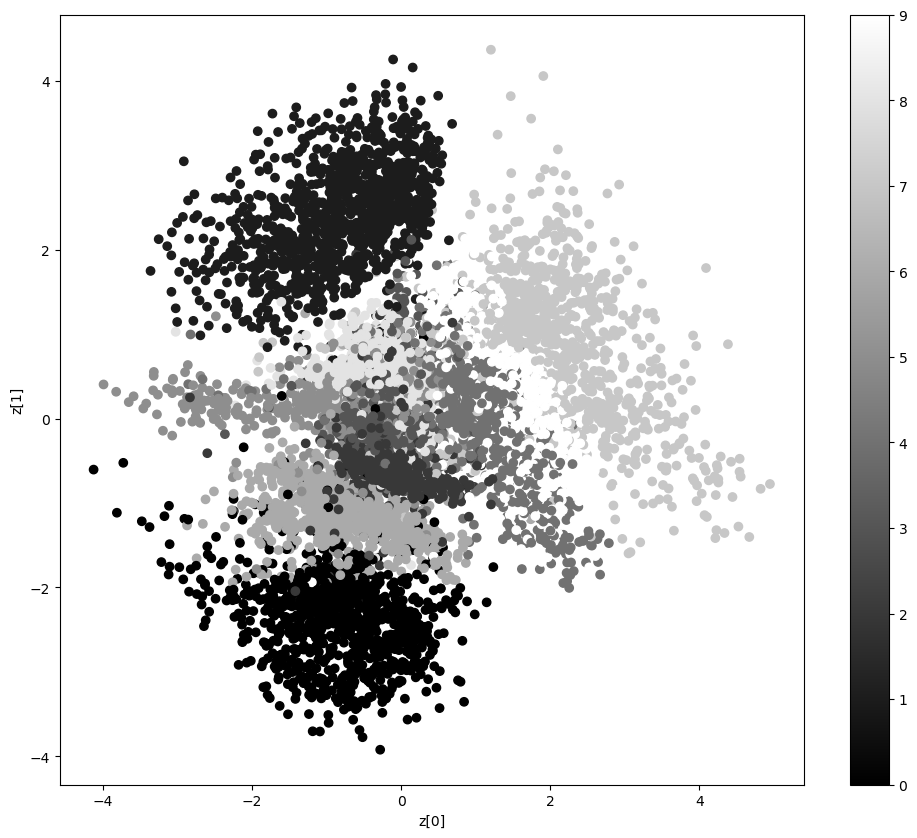

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


ValueError: The number of FixedLocator locations (31), usually from a call to set_ticks, does not match the number of labels (30).

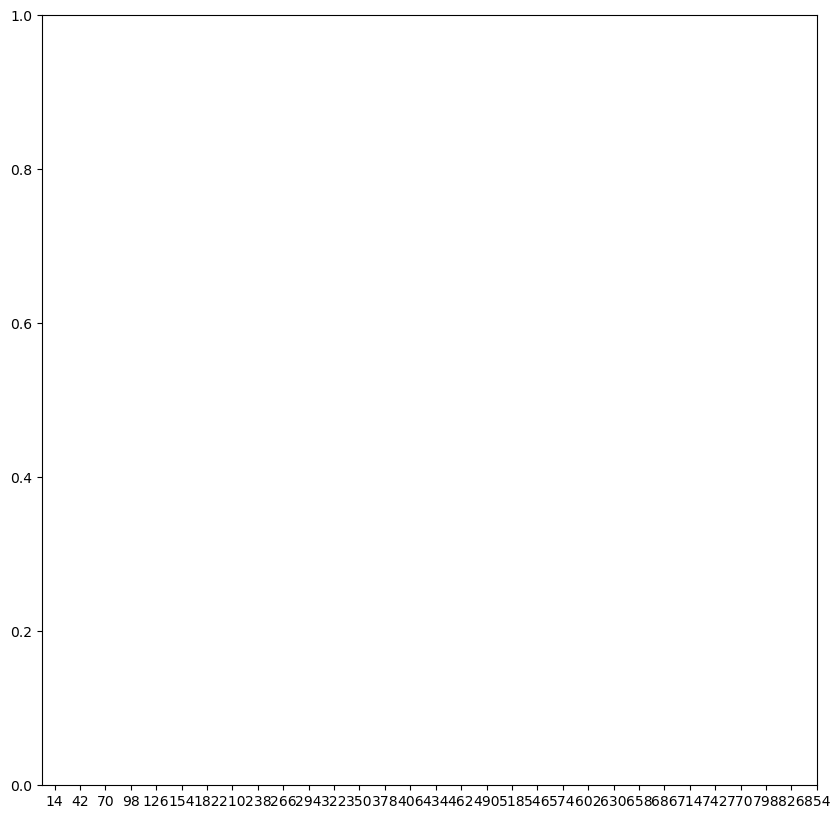

In [39]:
# Because the VAE is a generative model, we can also use it to generate new digits! Here we will scan the latent plane, sampling latent points at regular intervals and generating the corresponding digit for each of these points. This gives us a visualization of the latent manifold that "generates" the MNIST digits.
plot_results(models, data, batch_size=batch_size, model_name='vae_mlp')